### _Section 1_
***
### _1η Εργασία_ για το μάθημα _Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα_
##### Big Dataset's Notebook B10
***
### _Ομάδα A52_
    Μέλος 1 : Ρούλιος Χαράλαμπος    Α.Μ. 03114004
    Μέλος 2 : Καλαβάσης Αλβέρτος    Α.Μ. 03114091 
*** 

Πριν περάσουμε στο επόμενο section και την αρχή της εργασίας, πρέπει να αναφέρουμε πως o counter εκτέλεσης του notebook δεν ξεκινά από το 1 αλλά από μεγαλύτερη τιμή. Ο λόγος για αυτό είναι πως από την στιγμή που εκτελέσαμε διάφορα μοντέλα πάνω σε mlp (σε τοπικό υπολογιστή γιατί σε δύο cloud υπηρεσίες που δοκιμάσαμε, απαιτούσε πάρα πολύ χρόνο), δεν επανεκκινήσαμε ξανά τον πυρήνα του jupyter αλλά τρέχαμε διαρκώς ό,τι χρειαζόμασταν από την αρχή χωρίς να τρέχουμε ξανά τα cells που περιέχουν mlp κώδικα. Έτσι, αναπόφευκτα οι counters των cells θα είναι μεγάλοι και όχι απαραίτητα διαδοχικοί. Η παράδοση του ipynb μας γίνεται με όλα τα κελιά να έχουν τρέξει (είναι ορατό το output του κώδικα)

### _Section 2 : Dataset Analysis_

In [6]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade imbalanced-learn
%matplotlib inline
import matplotlib.pyplot as plt
import time
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

Requirement already up-to-date: pip in /home/tyler/anaconda3/lib/python3.6/site-packages (18.1)
Requirement already up-to-date: scikit-learn in /home/tyler/anaconda3/lib/python3.6/site-packages (0.20.1)
Requirement already up-to-date: pandas in /home/tyler/anaconda3/lib/python3.6/site-packages (0.23.4)
Requirement already up-to-date: numpy in /home/tyler/anaconda3/lib/python3.6/site-packages (1.15.4)
Requirement already up-to-date: scipy in /home/tyler/anaconda3/lib/python3.6/site-packages (1.1.0)
Requirement already up-to-date: imbalanced-learn in /home/tyler/anaconda3/lib/python3.6/site-packages (0.4.3)


In [7]:
!ls

A52-B10.ipynb  A52-S5.ipynb  A52-S5.py


In [8]:
# Parallel for loops.
# https://joblib.readthedocs.io/en/latest/parallel.html
!pip install --upgrade joblib
!pip install beautifultable
import itertools
from beautifultable import BeautifulTable

Requirement already up-to-date: joblib in /home/tyler/anaconda3/lib/python3.6/site-packages (0.13.0)


In [9]:
import numpy as np
import pandas as pd
# Read data from csv
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv", header=None, low_memory=False).values

In [10]:
# Source Code : https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-info">
<b>Question B1 : </b> Σύντομη παρουσίαση του dataset (τι περιγράφει).
</div>

Το B10 dataset αντιστοιχεί στο Epileptic Seizure Recognition Data Set. Το dataset αυτό είναι μία αναδομημένη εκδοχή του πιο συχνά χρησιμοποιημένου dataset για epileptic seizure detection (ESD Dataset). 

<div class="alert alert-block alert-info">
<b>Question B2 : </b> Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;
</div>

Περιέχει δεδομένα μίας χρονοσειράς, η οποία προέκυψε ως εξής :

Το αρχικό σύνολο δεδομένων από το __[ESD Dataset](http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3&changelang=3)__  αποτελείται από 5 διαφορετικούς φακέλους (SET A, B, C, D, E). Κάθε φάκελος περιέχει 100 txt αρχεία, με κάθε αρχείο να αντιπροσωπεύει ένα άτομο. 

Κάθε αρχείο είναι μια καταγραφή της δραστηριότητας του εγκεφάλου (EEG) για 23,6 sec. Οι αντίστοιχες χρονοσειρές υποβάλλονται σε δειγματοληψία σε 4097 σημεία. 'Ετσι, κάθε σημείο δεδομένων είναι η τιμή της EEG σε διαφορετικό χρονικό σημείο. Έχουμε, λοιπόν, συνολικά 500 άτομα και το καθένα έχει 4097 σημεία δεδομένων για 23,6 sec.

Στη συνέχεια, διαχωρίζουμε και ανακατεύουμε τα 4097 σημεία δεδομένων κάθε ατόμου σε 23 ίσα τμήματα. Έτσι, κάθε τμήμα περιέχει 178 σημεία δεδομένων για 1 δευτερόλεπτο και κάθε σημείο δεδομένων είναι η τιμή της εγγραφής EEG σε διαφορετικό χρονικό σημείο. Έτσι τώρα έχουμε 23 x 500 = 11500 δεδομένα (γραμμές) και κάθε γραμμή περιέχει τις 178 τιμές της EEG για αυτό το 1 δευτερόλεπτο (178 features). Η τελευταία στήλη (179η) αντιπροσωπεύει την ετικέτα y = {1,2,3,4,5}.

<table width=\"80%\">
   <caption>Πίνακας $1$: Epileptic Seizure Recognition Dataset Characteristics.</caption>
   <thead>
   <tr>
       <th>Number of Instances</th>
       <th>Number of Attributes</th>
       <th>Attribute Characteristics</th>
       <th>Missing Values?</th>
   </tr>
   </thead>
   <tbody>
       <tr>
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">11500</td>
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">178</td>
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">Real (EEG function values)</td>
           <td style=\"background-color:#F2F4F7\">No</td>  
       </tr>      
   </tbody>
</table>

Επίσης, δεν εμφανίζονται μη διατεταγμένα χαρακτηριστικά αφού οι χώροι $\mathbb{Z}_{2}$ και $\mathbb{R}$ διατάσσονται με κατάλληλη πράξη σύγκρισης (π.χ $\leq$).

<div class="alert alert-block alert-info">
<b>Question B3 : </b> Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;
</div>

Ναι, η πρώτη γραμμή και στήλη πρέπει να αφαιρεθούν.

<div class="alert alert-block alert-info">
<b>Question B4 : </b> Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται;
</div>

'Ετσι, για τον input vector $\vec{X} \in \mathbb{R}^{178},$ η $y$ δίνει ένα label στο σύνολο {1,2,3,4,5}, όπου :

-  5 : "eyes open" :: σημαίνει ότι κατά την καταγραφή του σήματος EEG του εγκεφάλου ο ασθενής είχε τα μάτια τους ανοιχτά.

-  4 : "eyes closed" :: σημαίνει ότι κατά την καταγραφή του σήματος EEG ο ασθενής είχε τα μάτια κλειστά.

-  3 ::  εντοπίζουν την περιοχή του όγκου στον εγκέφαλο και καταγράφουν τη δραστηριότητα του EEG από την υγιή περιοχή του εγκεφάλου.

-  2 :: Καταγράφουν το EEG από την περιοχή όπου βρίσκεται ο όγκος.

-  1 ::  Καταγραφή της seizure activity.

***

Όλα τα άτομα που εμπίπτουν στις κατηγορίες 2, 3, 4 και 5 είναι περιπτώσεις που δεν είχαν επιληπτική κρίση. Μόνο τα άτομα της κατηγορίας 1 έχουν επιληπτική κρίση.

Το κίνητρό για τη δημιουργία αυτής της έκδοσης των δεδομένων ήταν να απλοποιηθεί η πρόσβαση στα δεδομένα μέσω της δημιουργίας μιας έκδοσης .csv.  Αν και υπάρχουν 5 τάξεις, οι περισσότεροι συγγραφείς έχουν κάνει δυαδική ταξινόμηση, δηλαδή τάξη 1 (Επιληπτική κρίση) έναντι των υπόλοιπων.

<div class="alert alert-block alert-info">
<b>Question B5 : </b>Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?
</div>

Όχι. Μόνο να αφαιρέσουμε τη πρώτη γραμμή και στήλη.

<div class="alert alert-block alert-info">
<b>Question B6 : </b>Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;
</div>

Όχι. Κάθε κελί έχει μία valid τιμή της EEG. Δεν υπάρχουν τιμές NaN.

##### Dataset Analysis.

Παρακάτω, πρέπει να πετάξουμε την πρώτη γραμμή και στήλη των δεδομένων μας, λόγω του ότι περιέχει ετικέτες για τις γραμμές και στήλες. 



In [12]:
features = data[1:, 1:-1] 
targets = data[1:, -1]

# If you want a data subspace for faster results.
# samples = 1000
# features = features[0:samples, :]
# targets = targets[0:samples]

table = BeautifulTable()
table.column_headers = ["Data", "Rows", "Columns"]
table.append_row(['Features', features.shape[0], features.shape[1]])
table.append_row(['Targets', targets.shape[0], 1])
print(table)

+----------+-------+---------+
|   Data   | Rows  | Columns |
+----------+-------+---------+
| Features | 11500 |   178   |
+----------+-------+---------+
| Targets  | 11500 |    1    |
+----------+-------+---------+


Ας δούμε ένα τμήμα των features και των targets.

In [13]:
features_pd = pd.DataFrame(data=features)
features_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [14]:
targets_pd = pd.DataFrame(data=targets)
targets_pd.head()

,0
0,4
1,1
2,5
3,5
4,5


-  Σημειώνεται πως, σύμφωνα με το επίσημο archive του dataset μας (UCI Repository), to dataset μας δεν έχει missing values.

Επίσης, στο παρακάτω cell, από τη στιγμή που τα labels μας δεν είναι 0-1, αλλά τα ονόματα των κλάσεων είναι ακέραιοι αριθμοί (1-5), πρέπει για κάποιους classifiers, να τα μετατρέψουμε σε μία binary αναπαράσταση. Αυτή θα ονομάζεται targets_bin. Όμως,  όλοι οι ταξινομητές που χρησιμοποιούμε (GNB, kNN, MLP) είναι inherently multiclass και δεν χρειάζεται να κάνουμε one-vs-all. 

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer
warnings.filterwarnings('ignore')
mlb = MultiLabelBinarizer().fit(['1', '2', '3', '4', '5'])
targets_bin = mlb.transform(targets)

table_drc = BeautifulTable()
table_drc.column_headers = ["Data", "Rows", "Columns"]
table_drc.append_row(['Targets_Binary', targets_bin.shape[0], targets_bin.shape[1]])
print(table_drc)

+----------------+-------+---------+
|      Data      | Rows  | Columns |
+----------------+-------+---------+
| Targets_Binary | 11500 |    5    |
+----------------+-------+---------+


<div class="alert alert-block alert-info">
<b>Question B8 : </b>Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.
</div> 

Χωρίζουμε τα data μας σε training και testing sets με αναλογία 30%.

In [18]:
# If I want targets to be binary.
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets_bin, test_size=0.30, random_state=20176)

In [19]:
# If I want targets to be multiclass.
# X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.30, random_state=20176)

Παρακάτω, τα targets μας θα είναι multiclass (1-5). Τα dum_y_train, dum_y_test θα είναι πίνακες στήλες όπου θα περιέχουν τιμές στο σύνολο των labels (1-5). Απλά επειδή θέλουμε να κάνουμε μία μελέτη των περιεχομένων των labels για θέματα balancing, επιλέξαμε στην αρχή να έχουμε μία μορφή targets_bin με binary classes και, στην συνέχεια, τα γυρνάμε πίσω σε multiclass μορφή στις μεταβλητές dum_y_train, dum_y_test.  

##### Preprocessing.

Τα βήματα προεπεξεργασίας στοχεύουν:
* Στην αφαίρεση η αντικατάσταση απουσιάζουσων τιμών από το dataset.
* Στη μετατροπή των κατηγορικών μεταβλητών κατάλληλα ώστε να μπορούν να τους διαχειριστούν αλγόριθμοι μηχανικής μάθησης.
* Στην επιλογή ή εξαγωγή των κατάλληλων χαρακτηριστικών για το μοντέλο μας.

Τα στάδια που εφαρμόζουμε στο μοντέλο μας παρουσιάζονται παρακάτω. Σημειώνεται πως, επειδή στο τελικό στάδιο της εργασίας (στο optimization) μελετάμε την συμπεριφορά του μοντέλου αν εφαρμόσουμε ένα μέρος του preprocessing, αποθηκεύουμε σε κάθε στάδιο τους μέχρι τότε μετασχηματισμένους πίνακες :

To dataset μας είναι καθαρό από την μεριά των missing values και άρα παιρνάμε απ' ευθείας στο στάδιο της κανονικοποίησης των δεδομένων.

-  Πριν το normalization (αρχικό dataset) (πίνακες X_train_init, X_test_init). 

-  Normalization (πίνακες X_train_scaled, X_test_scaled).

Όπως θα δουμε παρακάτω δεν χρειαζόμαστε balancing.

Στο τέλος της διαδικασίας, οι πίνακες που έχουν περάσει από όλα τα στάδια είναι οι X_train, train_labels, X_test και test_labels.


In [20]:
warnings.filterwarnings('ignore')
from sklearn import preprocessing

-  #### Training Set Normalization

Μία τεχνική προεπεξεργασίας που μπορούμε να κάνουμε είναι η κανονικοποίηση των χαρακτηριστικών. Χαρακτηριστικά με πολύ μεγάλες διαφορές στις απόλυτες τιμές τους μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση και να δώσουν ταξινομητές με μη βέλτιστη απόδοση. Για το σκοπό αυτό, χρησιμοποιούμε την scale της preprocessing του sklearn καθώς και την min max για να συγκρίνουμε το μοντέλο σε διαφορετικά είδη κανονικοποίησης κατά το optimization.

Σημειώνεται πως ό,τι μετασχηματισμό κανονικοποίησης κάνουμε στο train set θα τον κάνουμε και στο test set, χρησιμοποιώντας όμως απαραίτητα το max ή τα $μ$ και $σ$ που έχουμε βρει στο train set, πράγμα που σημαίνει ότι στο test set μετά την κανονικοποίηση δεν θα έχουμε απαραίτητα παντού τιμές μεταξύ 0 και 1 και αντίστοιχα ούτε μέση τιμή 0 και διακύμανση 1.

In [21]:
X_train_init = X_train
X_test_init = X_test

#Standard score normalization.
X_train_scaled = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[[-0.17469149 -0.07419126 -0.15247875 ...  0.29992368  0.38492468
   0.32568112]
 [ 1.0114102   1.19969135  1.22052596 ...  0.0806456   0.32396543
   0.41772838]
 [ 0.19634545  0.01636912  0.03753529 ...  0.70802455  0.67752904
   0.60795939]
 ...
 [ 0.33624462  0.31219968  0.30110316 ...  0.22073993  0.23252657
   0.27045277]
 [ 0.14768487  0.07070534 -0.0053711  ...  0.30601474  0.26910212
   0.22136089]
 [-2.37050026 -1.95180971 -0.79607471 ...  1.65213849  0.09232031
  -1.17775747]]
[-3.05621643e-17 -2.79141789e-17 -1.59706616e-17  5.40630342e-18
 -1.19159341e-17  2.69211844e-17  9.26794873e-18  1.42053381e-17
  2.61626469e-17  1.10332723e-17  6.45446429e-17 -2.52661936e-17
  2.76383471e-17  2.34457036e-17  1.82048993e-17  1.53914149e-17
  9.51619735e-18 -1.07574405e-17 -3.70166285e-17  1.53914149e-17
  7.22679335e-18 -4.90980617e-18  1.65499084e-19 -6.67512974e-18
 -8.27495422e-19  6.84062882e-18  5.80350123e-17  4.42434219e-17
 -1.37915904e-19 -5.27942079e-17  2.54868590e-17  3.5

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(X_train_minmax, "\n")
X_test_minmax = min_max_scaler.transform(X_test)
print(X_test_minmax)

[[0.49091434 0.47866587 0.4965096  ... 0.4746604  0.47085321 0.49919872]
 [0.54715893 0.54206731 0.56166376 ... 0.46525601 0.4682035  0.50320513]
 [0.5085088  0.48317308 0.50552647 ... 0.49216301 0.48357181 0.51148504]
 ...
 [0.51514277 0.49789663 0.51803374 ... 0.47126437 0.46422893 0.49679487]
 [0.50620133 0.4858774  0.5034904  ... 0.47492163 0.46581876 0.49465812]
 [0.38678973 0.38521635 0.46596859 ... 0.53265413 0.45813461 0.43376068]] 

[[0.50591289 0.48798077 0.51018034 ... 0.46185998 0.45442501 0.48611111]
 [0.49956735 0.47596154 0.48923793 ... 0.44827586 0.44144144 0.48130342]
 [0.5093741  0.50030048 0.51716114 ... 0.4723093  0.45813461 0.49172009]
 ...
 [0.47274301 0.45342548 0.47440372 ... 0.40961338 0.40169581 0.44070513]
 [0.58407845 0.56790865 0.58376963 ... 0.68286311 0.68468468 0.72462607]
 [0.33890972 0.3500601  0.42001163 ... 0.35083595 0.37731849 0.42735043]]


Θα δοκιμάσουμε την επίδοση και με τους δύο τρόπους κανονικοποίησης. Για το ερώτημα Γ, θα ασχοληθούμε μόνο με τη scaled case.

In [23]:
X_train = X_train_scaled
X_test = X_test_scaled

<div class="alert alert-block alert-info">
<b>Question B7 : </b>Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.
</div> 

-  #### Εξισορρόπηση μη ισορροπημένων datasets

Με τον ορό μη ισορροπημένο dataset εννούμε ένα dataset στο οποίο τα πλήθη των δειγμάτων της κάθε κλάσης διαφέρουν σημαντικά μεταξύ τους. Σύμφωνα με την εκφώνηση, όταν ο λόγος μεταξύ του αριθμού των δειγμάτων δύο κλάσεων αρχίζει να είναι μεγαλύτερος από 2:3, μπορούμε να αρχίζουμε να θεωρούμε το dataset μη ισορροπημένο (imbalanced). Για να δούμε αν το dataset μας είναι ισορροπημένο ή μη θα δούμε πόσα δείγματα έχουμε ανά κατηγορία στο training set.

Αφού κάναμε normalization, ας δούμε αν χρειάζεται να κάνουμε balancing τα δεδομένα μας. 

In [24]:
#Dataset Balancing
table = BeautifulTable()
table.column_headers = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Training Set"]
table.append_row([y_train.sum(axis=0)[0], y_train.sum(axis=0)[1], y_train.sum(axis=0)[2], y_train.sum(axis=0)[3], y_train.sum(axis=0)[4], sum(y_train.sum(axis=0))  ])
table.append_row([y_train.sum(axis=0)[0]/sum(y_train.sum(axis=0)) * 100 , y_train.sum(axis=0)[1]* 100/sum(y_train.sum(axis=0)), y_train.sum(axis=0)[2]* 100/sum(y_train.sum(axis=0)), y_train.sum(axis=0)[3]* 100/sum(y_train.sum(axis=0)), y_train.sum(axis=0)[4]* 100/sum(y_train.sum(axis=0)), '100%'  ])

print(table)

#No need for balancing

+---------+---------+---------+---------+---------+----------------------------+
| Class 1 | Class 2 | Class 3 | Class 4 | Class 5 |        Training Set        |
+---------+---------+---------+---------+---------+----------------------------+
|  1601   |  1595   |  1606   |  1633   |  1615   |            8050            |
+---------+---------+---------+---------+---------+----------------------------+
| 19.888  | 19.814  |  19.95  | 20.286  | 20.062  |            100%            |
+---------+---------+---------+---------+---------+----------------------------+


Συνεπώς, δεν χρειάζεται εξισορρόπιση.

### _Section 3 : Baseline classification_

<div class="alert alert-block alert-info">
<b>Question Γ1 : </b>  Εκπαιδεύστε στο train τους classifiers με default τιμές (απλή αρχικοποίηση). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average. 
</div>


Πριν περάσουμε στο στάδιο του optimization, δοκιμάζουμε με τις default τιμές διάφορους classifiers που ακολουθούν. Υπενθυμίζεται πως το μοντέλο για το στάδιο αυτό έχει περάσει από το στάδιο του scaled normalization.

Θα δοκιμάσουμε πρώτα κάποιες πολύ απλές τακτικές ταξινόμησης. Η κλάση DummyClassifier δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:
* “uniform”: προβλέπει τυχαία και ομοιόμορφα.
* “constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης.
* “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.
* “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

Εμείς θα χρησιμοποιήσουμε μόνο τις uniform, most_frequent και stratified.
Ακολούθως, θα δοκιμάσουμε τους Gaussian Naive Bayes, kNN και MLP Classifier πάνω στο μοντέλο μας για να πάρουμε κάποια πρωταρχικά συμπεράσματα. 

Στην συνέχεια (Ερώτημα Δ), επιχειρούμε να βελτιστοποιήσουμε το μοντέλο μας.

In [25]:
# We need multiclass everywhere so dum_y_{train, test} everywhere below.
dum_y_train = np.asarray(mlb.inverse_transform(y_train)).flatten()
dum_y_test = np.asarray(mlb.inverse_transform(y_test)).flatten()

In [27]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

In [29]:
warnings.filterwarnings('ignore')
#constructors
dc_uniform = DummyClassifier(strategy="uniform")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")
gnb = GaussianNB()
kNN = neighbors.KNeighborsClassifier()
MLP = MLPClassifier()

#fit
dc_uniform.fit(X_train, dum_y_train)
dc_most_frequent.fit(X_train, dum_y_train) 
dc_stratified.fit(X_train, dum_y_train)
gnb.fit(X_train, dum_y_train) #kai to gnb 8elei 1,2,3,4,5
kNN.fit(X_train, dum_y_train)
MLP.fit(X_train, dum_y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
#predict
Baseline_predictions = [dc_uniform.predict(X_test), dc_most_frequent.predict(X_test), dc_stratified.predict(X_test), gnb.predict(X_test), kNN.predict(X_test), MLP.predict(X_test)]
test_labels = [dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test] 
objs = ['DC-Uni', 'DC-MF', 'DC-Str', 'GNB', 'kNN', 'MLP']

-  #### Confusion matrix, f1-micro average και f1-macro average.

Πριν υπολογίσουμε τις μετρικές επίδοσης, ας δούμε ξανά τους ορισμούς ώστε να μπορούμε μετά να σχολιάσουμε τα αποτελέσματα.

-  O πίνακας σύχγυσης $C$  είναι τέτοιος ώστε το $C_{i, j}$ είναι ίσο με τα δείγματα που ενώ ανήκουν στην κατηγορία $i$ ταξινομήθηκαν στην κατηγορία  $j$. Τα στοιχεία της διαγωνίου είναι αληθινά θετικά δείγματα (true positive) της κάθε κλάσης. Για κάθε κλάση $i$ τα στοιχεία της γραμμής $i$ εκτός της διαγωνίου είναι λάνθασμένα αρνητικά δείγματα (false negative) της κλάσης και τα στοιχεία της κολώνας $i$ εκτός της διαγωνίου είναι λανθασμένα θετικά δείγματα (false positive) της κλάσης. 
 -  Σε περίπτωση δυαδικού ταξινομητή $C_{0,0}$ είναι τα αληθινά αρνητικά δείγματα (true negative, η κλάση 0 θεωρείται η αρνητική), $C_{1,0}$ είναι τα λανθασμένα αρνητικά δείγματα, $C_{1,1}$ τα αληθινά θετικά δείγματα και $C_{0,1}$ τα λανθασμένα θετικά.


-  Ακρίβεια -Precision- ($P$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false positives ($F_p$).
$$P = \frac{T_p}{T_p+F_p}$$
-  Ανάκληση -Recall- ($R$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false negatives ($F_n$).
$$R = \frac{T_p}{T_p + F_n}$$
- ($F_1$) score είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης.
$$F1 = 2\frac{P \times R}{P+R}$$

    - Ιδανικά θέλουμε και υψηλή ακρίβεια και υψηλή ανάκληση, ωστόσο μεταξύ της ακρίβειας και της ανάκλησης υπάρχει γενικά trade-off. 

In [31]:
# Confusion matrix, f1-micro, f1-macro.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [32]:
def conf_f1_pred(pred_list, test_labels_list, names):
    for i, clf in enumerate(names):
        pred = pred_list[i]
        test_labels = test_labels_list[i]
        ##########################
        print('For the ' + clf + ' : ')
        print('------------------')
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(test_labels, pred)
        # τυπώνουμε τα labels
        labels_name = ['1', '2', '3', '4', '5']
        print('Labels values : ')
        print(labels_name)
        print('------------------')
        # τυπώνουμε το confusion matrix
        print('Confusion matrix [' + clf + '] : ')
        plot_confusion_matrix(cnf_matrix, labels_name)
        print('------------------')
        # εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
        print('Precision - Recall - f1[micro] - Support :')
        print(precision_recall_fscore_support(test_labels, pred, average='micro'))
        print('------------------')
        # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
        print('Precision - Recall - f1[macro] - Support :')
        print(precision_recall_fscore_support(test_labels, pred, average='macro'))
        print('------------------')
        # εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας. Με average = weighted κάθε κλάση μετρά στο μέσο όρο ανάλογα με το support της.
        print('Precision - Recall - f1[weighted] - Support :')
        print(precision_recall_fscore_support(test_labels, pred, average='weighted'))
        print('------------------')
        # η classification_report τυπώνει πιο ωραία οπτικά σε string τα αποτελέσματα
        # πρώτα για κάθε κλάση και μετά με μέσους όρους
        print('Classification Report  :')
        print(classification_report(test_labels, pred, target_names=labels_name))

For the DC-Uni : 
------------------
Labels values : 
['1', '2', '3', '4', '5']
------------------
Confusion matrix [DC-Uni] : 
Confusion matrix, without normalization
[[132 153 134 132 148]
 [142 135 156 150 122]
 [149 128 143 132 142]
 [101 157 124 155 130]
 [141 140 133 142 129]]


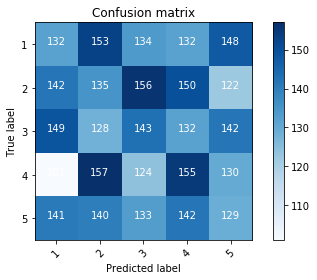

------------------
Precision - Recall - f1[micro] - Support :
(0.20115942028985506, 0.20115942028985506, 0.20115942028985506, None)
------------------
Precision - Recall - f1[macro] - Support :
(0.20106732327901938, 0.20141748251937536, 0.20116680299888584, None)
------------------
Precision - Recall - f1[weighted] - Support :
(0.2009166703265913, 0.20115942028985506, 0.2009636631700188, None)
------------------
Classification Report  :
              precision    recall  f1-score   support

           1       0.20      0.19      0.19       699
           2       0.19      0.19      0.19       705
           3       0.21      0.21      0.21       694
           4       0.22      0.23      0.22       667
           5       0.19      0.19      0.19       685

   micro avg       0.20      0.20      0.20      3450
   macro avg       0.20      0.20      0.20      3450
weighted avg       0.20      0.20      0.20      3450

For the DC-MF : 
------------------
Labels values : 
['1', '2', '3', '

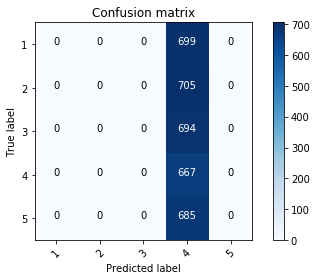

------------------
Precision - Recall - f1[micro] - Support :
(0.19333333333333333, 0.19333333333333333, 0.19333333333333333, None)
------------------
Precision - Recall - f1[macro] - Support :
(0.03866666666666667, 0.2, 0.06480446927374302, None)
------------------
Precision - Recall - f1[weighted] - Support :
(0.037377777777777774, 0.19333333333333333, 0.06264432029795158, None)
------------------
Classification Report  :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       699
           2       0.00      0.00      0.00       705
           3       0.00      0.00      0.00       694
           4       0.19      1.00      0.32       667
           5       0.00      0.00      0.00       685

   micro avg       0.19      0.19      0.19      3450
   macro avg       0.04      0.20      0.06      3450
weighted avg       0.04      0.19      0.06      3450

For the DC-Str : 
------------------
Labels values : 
['1', '2', '3', '4', '5']
---

/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


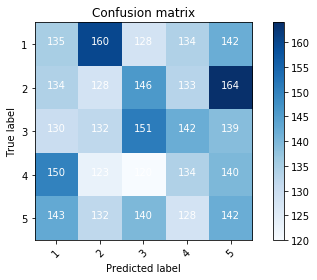

------------------
Precision - Recall - f1[micro] - Support :
(0.2, 0.2, 0.20000000000000004, None)
------------------
Precision - Recall - f1[macro] - Support :
(0.20003589493210167, 0.200094280383317, 0.2000087159623707, None)
------------------
Precision - Recall - f1[weighted] - Support :
(0.20001045024359104, 0.2, 0.19994871850803178, None)
------------------
Classification Report  :
              precision    recall  f1-score   support

           1       0.20      0.19      0.19       699
           2       0.19      0.18      0.19       705
           3       0.22      0.22      0.22       694
           4       0.20      0.20      0.20       667
           5       0.20      0.21      0.20       685

   micro avg       0.20      0.20      0.20      3450
   macro avg       0.20      0.20      0.20      3450
weighted avg       0.20      0.20      0.20      3450

For the GNB : 
------------------
Labels values : 
['1', '2', '3', '4', '5']
------------------
Confusion matrix [GNB] 

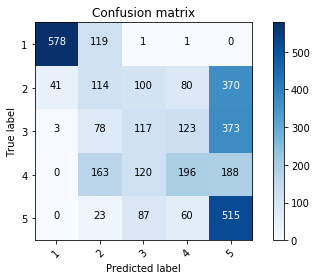

------------------
Precision - Recall - f1[micro] - Support :
(0.4405797101449275, 0.4405797101449275, 0.4405797101449275, None)
------------------
Precision - Recall - f1[macro] - Support :
(0.44323453839433197, 0.44057269599753673, 0.4210122016724589, None)
------------------
Precision - Recall - f1[weighted] - Support :
(0.443618419505848, 0.4405797101449275, 0.4213428871464058, None)
------------------
Classification Report  :
              precision    recall  f1-score   support

           1       0.93      0.83      0.88       699
           2       0.23      0.16      0.19       705
           3       0.28      0.17      0.21       694
           4       0.43      0.29      0.35       667
           5       0.36      0.75      0.48       685

   micro avg       0.44      0.44      0.44      3450
   macro avg       0.44      0.44      0.42      3450
weighted avg       0.44      0.44      0.42      3450

For the kNN : 
------------------
Labels values : 
['1', '2', '3', '4', '5']

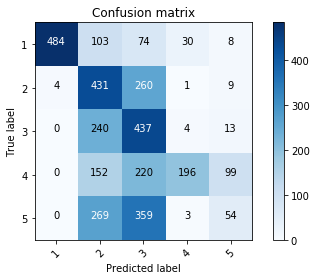

------------------
Precision - Recall - f1[micro] - Support :
(0.4643478260869565, 0.4643478260869565, 0.4643478260869565, None)
------------------
Precision - Recall - f1[macro] - Support :
(0.5617730486558252, 0.4612266889456563, 0.4512549068809039, None)
------------------
Precision - Recall - f1[weighted] - Support :
(0.5602920976595913, 0.4643478260869565, 0.45276979594406813, None)
------------------
Classification Report  :
              precision    recall  f1-score   support

           1       0.99      0.69      0.82       699
           2       0.36      0.61      0.45       705
           3       0.32      0.63      0.43       694
           4       0.84      0.29      0.44       667
           5       0.30      0.08      0.12       685

   micro avg       0.46      0.46      0.46      3450
   macro avg       0.56      0.46      0.45      3450
weighted avg       0.56      0.46      0.45      3450

For the MLP : 
------------------
Labels values : 
['1', '2', '3', '4', '5']

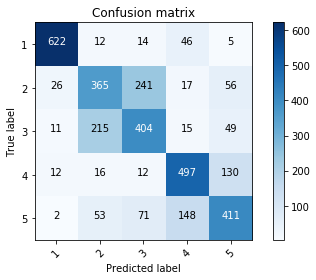

------------------
Precision - Recall - f1[micro] - Support :
(0.6663768115942029, 0.6663768115942029, 0.6663768115942029, None)
------------------
Precision - Recall - f1[macro] - Support :
(0.6679275821064599, 0.6669666259818323, 0.6668328073262958, None)
------------------
Precision - Recall - f1[weighted] - Support :
(0.6678729698390371, 0.6663768115942029, 0.6665149297409498, None)
------------------
Classification Report  :
              precision    recall  f1-score   support

           1       0.92      0.89      0.91       699
           2       0.55      0.52      0.53       705
           3       0.54      0.58      0.56       694
           4       0.69      0.75      0.72       667
           5       0.63      0.60      0.62       685

   micro avg       0.67      0.67      0.67      3450
   macro avg       0.67      0.67      0.67      3450
weighted avg       0.67      0.67      0.67      3450



In [421]:
test_labels = [dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test]
objs = ['DC-Uni', 'DC-MF', 'DC-Str', 'GNB', 'kNN', 'MLP']

# Baseline preds :
# For i=0,1,2,3 : Baseline_preds[i] have 3450 rows and 1 column with {1,2,3,4,5}
# For i=4,5 : they are 3450 rows and 5 cols with '1's and '0's
# for i in range(3000):
#     print(Baseline_predictions[4][i])

conf_f1_pred(Baseline_predictions, test_labels, objs)

<div class="alert alert-block alert-info">
<b>Question Γ2 : </b> Για κάθε averaged metric, εκτυπώστε bar plot συγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.
</div>



-  Για κάθε average metric (micro, macro, weighted), κάνουμε ένα bar plot για την f1 για όλους του classifiers.

In [33]:
#plot
from sklearn.metrics import precision_recall_fscore_support

In [34]:
def plot_f1_scores(Baseline_predictions, test_labels, objects):
    n_groups = len(Baseline_predictions)
    colors = ['b', 'g', 'r']
    avg_metric = ['micro', 'macro', 'weighted']
    # create plot
    plt.figure(figsize = (13,5))
    index = np.arange(n_groups)
    bar_width = 0.15
    opacity = 0.8

    for i, metric in enumerate(avg_metric):
        performance = []
        for j, pred in enumerate(Baseline_predictions): #from 6 classifiers
            res_list = precision_recall_fscore_support(test_labels[j], pred, average=metric)
            f1_score = res_list[2]
            performance.append(f1_score)
        rects = plt.bar(index + i*bar_width, performance, bar_width,
                     alpha=opacity,
                     color=colors[i],
                     label=metric)
    plt.legend(loc='best', bbox_to_anchor=(1.0, 0.55),
          ncol=3, fancybox=True, shadow=True)
    
    plt.xlabel('Classifier')
    plt.ylabel('f1_score')
    plt.title('f1_score metric for the 6 classifiers.')
    plt.xticks(index + bar_width, objects)

    plt.tight_layout()
    plt.show()

/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


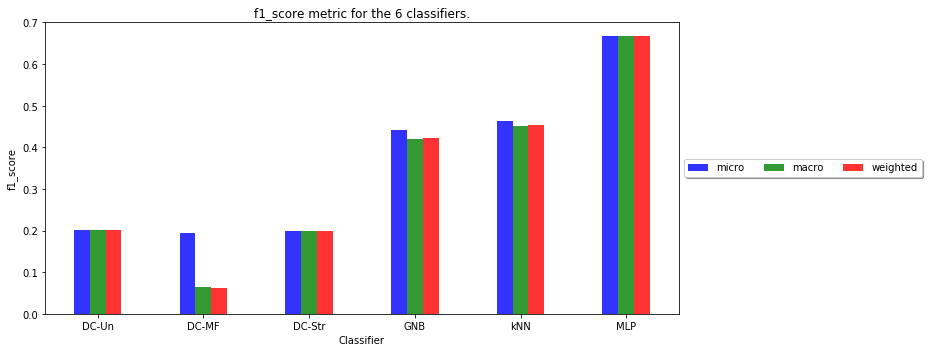

In [424]:
objects = ('DC-Un', 'DC-MF', 'DC-Str', 'GNB', 'kNN', 'MLP')
test_labels = [dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test]
plot_f1_scores(Baseline_predictions, test_labels, objects)

<div class="alert alert-block alert-info">
<b>Question Γ3 : </b>Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης. 
</div>



Όπως είναι αναμενόμενο, τα Dummy Classifiers έχουν απόδοση κοντά στο 20% μιας και ο αριθμός των κλάσεων είναι 5. Από κει και πέρα για τους ταξινομητές GNB και kNN παρατηρούμε μια μέτρια απόδοση, λίγο κάτω από το 50%, ενώ ο MLP δείχνει να είναι το πιο κατάλληλο για το συγκεκριμένο Dataset. Φυσικά υπάρχει περιθώριο βελτίωσης αυτών των score με την βελτιστοποίηση των υπερπαραμέτρων των ταξινομητών, όπως θα φανεί και στη συνέχεια.

Να σημειωθεί ότι παρατηρώντας τα Confusion Matrix (εκτός αυτών των Dummy), βλέπουμε μεγάλη επιτυχία στην ταξινόμηση της 1ης κλάσης, πράγμα που θα αναλυθεί στα τελικά συμπεράσματα.

### _Section 4 : Classifiers - Training & Optimization._

<div class="alert alert-block alert-info">
<b>Question Δ1 : </b> Για κάθε ταξινομητή βελτιστοποιήστε την απόδοσή του στο training set μέσω της διαδικασίας προεπεξεργασίας και εύρεσης βέλτιστων υπερπαραμέτρων (δεν έχουν όλοι οι ταξινομητές υπερπαραμέτρους). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average. 
</div>

Η διαδικασία βελτιστοποίσης είναι η ακόλουθη :

-   Για κάθε ταξινομητή, έστω clf, ορίζουμε τις υποψήφιες τιμές υπερπαραμέτρων που θα μας δώσουν την βέλτιστη επίδοση. 
-   Ορίζουμε, για τον clf, ένα pipeline, το οποίο, αρχικά, περιέχει το στάδιο της dimensionality reduction με PCA και, στη συνέχεια, το στάδιο του fit του clf. Επίλέξαμε να μην συμπεριλάβουμε στο pipeline το στάδιο της κανονικοποίησης γιατί θα επαναλαμβανόταν άσκοπα πάνω στα ίδια  δεδομένα.
-   Το στάδιο του fitting για τον ταξινομητή clf υλοποιείται με μία grid search πάνω στον χώρο που ορίζουν οι υπερπαράμετροι. Αν αυτές είναι οι $h_{1} \in \mathcal{H}_{1}, h_{2} \in \mathcal{H}_{2},..., h_{k} \in \mathcal{H}_{k}, $ τότε η αναζήτηση λαμβάνει χώρα στον $\mathcal{H}_{1} \times \mathcal{H}_{2} \times ... \times \mathcal{H}_{k}.$
Επίσης, σε κάθε βήμα, το fitting γίνεται με ένα 5-fold cross validation. Η ιδέα του CV υπενθιμίζεται παρακάτω.
-   'Ετσι, προκύπτει η βέλτιστη λύση $(h^{*}_{1}, h^{*}_{2}, ..., h^{*}_{k}).$

***

Επιλογή για βελτιστοποίηση του $\vec{h} = (h_{1}, h_{2}, ..., h_{k})$ : Cross Validation.

Για να βρούμε τη βέλτιστη τιμή του $\vec{h}$, ώστε να μπορούμε να γενικεύσουμε το μοντέλο μας, 
πραγματοποιούμε CV πάνω στο αντίστοιχο clf.

Στο Cross Validation, αρχικά, χωρίζουμε το training set σε έναν αριθμό folds. Επιλέγουμε πλήθος folds k = 10, όπως φαίνεται και στην εικόνα. 

![Cross validation](https://sebastianraschka.com/images/faq/evaluate-a-model/k-fold.png "Cross Validation")

Στη συνέχεια, για κάθε k-fold, θεωρούμε ότι τα (k-1) folds είναι training set και ότι το fold που αφήσαμε έξω είναι το test set. Υπολογίζουμε τη μετρική σφάλματός μας στο test set που ορίζει το fold. Επαναλαμβάνουμε τη διαδικασία για τα k folds για κάθε τιμή των υπερπαραμέτρων και υπολογίζουμε τη μέση τιμή της μετρικής του σφάλματος. Με αυτό τον τρόπο, αφενός είμαστε αμερόληπτοι στην αξιολόγηση αφήνοντας τελείως έξω το test set και αφετέρου χρησιμοποιούμε αποτελεσματικά τα δεδομένα εκπαίδευσης: τα χρησιμοποιούμε όλα και παίρνοντας τη μέση τιμή εξαλείφουμε πιθανές ανωμαλίες στα δεδομένα.

##### Section 4.1 : Dummy Classifier

In [425]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Some initializations.
labels_name = ['1', '2', '3', '4', '5']
predictions_macro = []
predictions_micro = []
durations = []

#Constructors.
dc_uniform = DummyClassifier(strategy="uniform")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")


In [426]:
#fit&predict all dummy classifiers
def time_predict_dummy(clf, X_train, X_test, y_train, y_test, labels_name, classifier_name):
    start_time = time.time()
    results_list = []
    model = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    results_list.append(time.time() - start_time)
    
    results_list.append(pred)
    results_list.append(pred)

    print("Classification Report using " + classifier_name + " on the Dataset (30% test set)\n")
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred, target_names=labels_name))
    
    return results_list

#dc_uniform
results_list = time_predict_dummy(dc_uniform, X_train, X_test, dum_y_train, dum_y_test, labels_name, "Dummy Uniform")

durations.append(results_list[0])
predictions_macro.append(results_list[1])
predictions_micro.append(results_list[2])

#dc_most_frequent
results_list = time_predict_dummy(dc_most_frequent, X_train, X_test, dum_y_train, dum_y_test, labels_name, "Dummy Most Frequent")

durations.append(results_list[0])
predictions_macro.append(results_list[1])
predictions_micro.append(results_list[2])

#dc_stratified
results_list = time_predict_dummy(dc_stratified, X_train, X_test, dum_y_train, dum_y_test, labels_name, "Dummy Stratified")

durations.append(results_list[0])
predictions_macro.append(results_list[1])
predictions_micro.append(results_list[2])

Classification Report using Dummy Uniform on the Dataset (30% test set)

[[130 146 130 137 156]
 [143 149 137 140 136]
 [131 119 161 155 128]
 [110 140 147 142 128]
 [143 137 142 132 131]]
              precision    recall  f1-score   support

           1       0.20      0.19      0.19       699
           2       0.22      0.21      0.21       705
           3       0.22      0.23      0.23       694
           4       0.20      0.21      0.21       667
           5       0.19      0.19      0.19       685

   micro avg       0.21      0.21      0.21      3450
   macro avg       0.21      0.21      0.21      3450
weighted avg       0.21      0.21      0.21      3450

Classification Report using Dummy Most Frequent on the Dataset (30% test set)

[[  0   0   0 699   0]
 [  0   0   0 705   0]
 [  0   0   0 694   0]
 [  0   0   0 667   0]
 [  0   0   0 685   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       699
           2      

/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Section 4.2 : Gaussian Naive Bayes

In [427]:
def fit_predict(estimator, X_train, X_test, y_train, y_test, labels_name, classifier_name):
    start_time = time.time()
    estimator.fit(X_train, y_train)
    pred = estimator.predict(X_test)
    duration = time.time() - start_time

    print("Classification Report using " + classifier_name +" on the Dataset (30% test set)\n")
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred, target_names=labels_name))

    print("GridSearch Optimal parameters:\n")
    print(estimator.best_params_)
    print()
    
    return [duration, pred]

In [428]:
#Pipeline
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pca = PCA()


In [429]:
def optimizer(pipe, hyperparams_dict, predictions, X_train, X_test, y_train, y_test, labels_name, optimization_name, metric_name, durations=None):
    estimator = GridSearchCV(pipe, hyperparams_dict, cv=5, scoring=metric_name, n_jobs=-1)
    results_list = fit_predict(estimator, X_train, X_test, y_train, y_test, labels_name, optimization_name)
    predictions.append(results_list[1])
    if durations != None :
        durations.append(results_list[0])
        return durations, predictions
    return predictions

In [430]:
# GNB case.
gnb = GaussianNB()
pipe_gnb = Pipeline(steps=[('pca', pca), ('gnb', gnb)], memory = 'tmp')
#cross-validation for f1_macro
n_components = range(10, 60, 10)
hyperparams_gnb = dict(pca__n_components=n_components)

#cross-validation for macro
# estimator = GridSearchCV(pipe, dict(pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)
# results_list = fit_predict(estimator, X_train, X_test, dum_y_train, dum_y_test, labels_name, "GNB (macro) optimization")
# durations.append(results_list[0])
# predictions_macro.append(results_list[1])

durations, predictions_macro = optimizer(pipe_gnb, hyperparams_gnb, predictions_macro, X_train, X_test, dum_y_train, dum_y_test, labels_name, "GNB (macro) optimization", 'f1_macro', durations)

print('--------------------------------------------------------------')
#cross-validation for micro
predictions_micro = optimizer(pipe_gnb, hyperparams_gnb, predictions_micro, X_train, X_test, dum_y_train, dum_y_test, labels_name, "GNB (micro) optimization", 'f1_micro')

# estimator = GridSearchCV(pipe, dict(pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)
# results_list = fit_predict(estimator, X_train, X_test, dum_y_train, dum_y_test, labels_name, "GNB (micro) optimization")
# predictions_micro.append(results_list[1])

Classification Report using GNB (macro) optimization on the Dataset (30% test set)

[[622  40   0  36   1]
 [ 31 154 454  27  39]
 [  3 105 533  26  27]
 [  2  30  20 471 144]
 [  0  19 165  70 431]]
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       699
           2       0.44      0.22      0.29       705
           3       0.45      0.77      0.57       694
           4       0.75      0.71      0.73       667
           5       0.67      0.63      0.65       685

   micro avg       0.64      0.64      0.64      3450
   macro avg       0.65      0.64      0.63      3450
weighted avg       0.65      0.64      0.63      3450

GridSearch Optimal parameters:

{'pca__n_components': 50}

--------------------------------------------------------------
Classification Report using GNB (micro) optimization on the Dataset (30% test set)

[[622  40   0  36   1]
 [ 31 154 454  27  39]
 [  3 105 533  26  27]
 [  2  30  20 471 144]
 [  0  19 165

Βλέπουμε ότι ο βέλτιστος αριθμός κυρίων συνιστωσών PCA για το GNB είναι 50.

##### Section 4.3 : kNN Classifier

In [92]:
clf = neighbors.KNeighborsClassifier()
pipe_kNN = Pipeline(steps=[('pca', pca), ('kNN', clf)], memory = 'tmp')

In [93]:
#kNN parameters
k = [1, 5, 11, 15, 21, 25]
weights = ['uniform', 'distance'] #https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
metric = ['euclidean', 'manhattan', 'chebyshev'] #https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

#PCA components
n_components = [20, 30, 40, 50]

In [94]:
#cross-validation for f1_macro
hyperparams_kNN = dict(pca__n_components=n_components, kNN__n_neighbors=k, kNN__weights=weights, kNN__metric=metric)
durations, predictions_macro = optimizer(pipe_kNN, hyperparams_kNN, predictions_macro, X_train, X_test, dum_y_train, dum_y_test, labels_name, "kNN (macro) optimization", 'f1_macro', durations)
print('----------------------------------------------')

Classification Report using kNN (macro) optimization on the Dataset (30% test set)

[[527  64  44  45  19]
 [  1 475 178   5  46]
 [  0 161 464   8  61]
 [  0  86  97 268 216]
 [  0 173 230  42 240]]
              precision    recall  f1-score   support

           1       1.00      0.75      0.86       699
           2       0.50      0.67      0.57       705
           3       0.46      0.67      0.54       694
           4       0.73      0.40      0.52       667
           5       0.41      0.35      0.38       685

   micro avg       0.57      0.57      0.57      3450
   macro avg       0.62      0.57      0.57      3450
weighted avg       0.62      0.57      0.58      3450

GridSearch Optimal parameters:

{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 30}

----------------------------------------------


In [121]:
#cross-validation for micro
predictions_micro = optimizer(pipe_kNN, hyperparams_kNN, predictions_micro, X_train, X_test, dum_y_train, dum_y_test, labels_name, "kNN (micro) optimization", 'f1_micro')


Classification Report using kNN (micro) optimization on the Dataset (30% test set)

[[527  64  44  45  19]
 [  1 475 178   5  46]
 [  0 161 464   8  61]
 [  0  86  97 268 216]
 [  0 173 230  42 240]]
              precision    recall  f1-score   support

           1       1.00      0.75      0.86       699
           2       0.50      0.67      0.57       705
           3       0.46      0.67      0.54       694
           4       0.73      0.40      0.52       667
           5       0.41      0.35      0.38       685

   micro avg       0.57      0.57      0.57      3450
   macro avg       0.62      0.57      0.57      3450
weighted avg       0.62      0.57      0.58      3450

GridSearch Optimal parameters:

{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 30}



Για τον ταξινομητή kNN, οι βέλτιστες παράμετροι φαίνονται παραπάνω, μεταξύ των οποίων το βέλτιστο k είναι 1 και το πλήθος των νέων χαρακτηριστικών μέσω PCA είναι 30. Ένα αντικείμενο ταξινομείται με βάση την πλειοψηφική κλάση των γειτόνων του, (δηλαδή το αντικείμενο ανατίθεται στην τάξη που είναι πιο συνηθισμένη στους πλησιέστερους γείτονές του (k είναι θετικός ακέραιος, συνήθως μικρός)). Αν k = 1, τότε το αντικείμενο απλώς αποδίδεται στην κλάση του μοναδικού πλησιέστερου γείτονα, πράγμα που φαίνεται να είναι το βέλτιστο για το συγκεκριμένο Dataset.

##### Section 4.4 : Multi-Layer Perceptron

Όπως αναφέρεται και στο FAQ : _'Εάν ένα dataset είναι πολύ μεγάλο, θέλετε να εξερευνήσετε ένα μεγάλο χώρο αναζήτησης υπερπαραμέτρων και δείτε ότι καθυστερεί το gridsearch cv, μπορείτε να ξεκινήσετε την αναζήτηση κάνοντας τυχαίο sampling δειγμάτων ενός ποσοστού του dataset. Εφόσον προσδιορίσετε τις περιοχές τιμών που δίνουν καλά αποτελέσματα, μπορείτε να κάνετε ένα πιο στενό grid search με όλα τα δείγματα.'_

In [40]:
from sklearn.utils import shuffle
sdata, starget = shuffle(features, targets, random_state=341976)
# Pick a smaller part for the dataset.
samples = 1500
features_small = sdata[0:samples, :]
targets_small = starget[0:samples]
targets_bin_small = mlb.transform(targets_small)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(features_small, targets_small, test_size=0.30, random_state=20176)
# Norm
X_train_scaled_small = preprocessing.scale(X_train_small)
scaler_small = preprocessing.StandardScaler().fit(X_train_small)
X_test_scaled_small = scaler_small.transform(X_test_small)
# Minmax
X_train_minmax_small = min_max_scaler.fit_transform(X_train_small)
X_test_minmax_small = min_max_scaler.transform(X_test_small)
# ...
#print(X_train_scaled_small.shape)

/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [219]:
clf = MLPClassifier()
pipe_mlp = Pipeline(steps=[('pca', pca), ('MLP', clf)], memory = 'tmp')

In [42]:
# MLP parameters
hidden_layer_sizes = [(10,), (25,), (100,)]
activation = ['identity', 'tanh', 'relu']
solver = ['lbfgs', 'sgd'] #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
max_iter = [300]
learning_rate = ['invscaling', 'adaptive']
alpha = [0.00005, 0.0001]

#PCA components
n_components = [40, 60, 80]

In [43]:
# Add code for the small.
predictions_macro_small = []
predictions_micro_small = []
durations_small = []

#cross-validation for f1_macro
hyperparams_mlp = dict(pca__n_components=n_components, MLP__hidden_layer_sizes=hidden_layer_sizes, MLP__activation=activation, MLP__solver=solver, MLP__max_iter=max_iter, MLP__learning_rate=learning_rate, MLP__alpha=alpha)
durations_small, predictions_macro_small = optimizer(pipe_mlp, hyperparams_mlp, predictions_macro_small, X_train_small, X_test_small, y_train_small, y_test_small, labels_name, "MLP (macro) optimization (small)", 'f1_macro', durations)

print('--------------------------------------------------------')
predictions_micro_small = optimizer(pipe_mlp, hyperparams_mlp, predictions_micro_small, X_train_small, X_test_small, y_train_small, y_test_small, labels_name, "MLP (micro) optimization (small)", 'f1_micro')

/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Classification Report using MLP (macro) optimization (small) on the Dataset (30% test set)

[[55 15 12 10 13]
 [14 24 35  2  5]
 [ 9 33 41  2 15]
 [16  6  3 40 26]
 [10  8 15 22 19]]
              precision    recall  f1-score   support

           1       0.53      0.52      0.53       105
           2       0.28      0.30      0.29        80
           3       0.39      0.41      0.40       100
           4       0.53      0.44      0.48        91
           5       0.24      0.26      0.25        74

   micro avg       0.40      0.40      0.40       450
   macro avg       0.39      0.39      0.39       450
weighted avg       0.41      0.40      0.40       450

GridSearch Optimal parameters:

{'MLP__activation': 'relu', 'MLP__alpha': 5e-05, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'adaptive', 'MLP__max_iter': 300, 'MLP__solver': 'sgd', 'pca__n_components': 40}

--------------------------------------------------------


/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Classification Report using MLP (micro) optimization (small) on the Dataset (30% test set)

[[58 14  9  8 16]
 [16 17 38  2  7]
 [10 31 45  2 12]
 [18  6  4 42 21]
 [13 10 10 20 21]]
              precision    recall  f1-score   support

           1       0.50      0.55      0.53       105
           2       0.22      0.21      0.22        80
           3       0.42      0.45      0.44       100
           4       0.57      0.46      0.51        91
           5       0.27      0.28      0.28        74

   micro avg       0.41      0.41      0.41       450
   macro avg       0.40      0.39      0.39       450
weighted avg       0.41      0.41      0.41       450

GridSearch Optimal parameters:

{'MLP__activation': 'relu', 'MLP__alpha': 5e-05, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'adaptive', 'MLP__max_iter': 300, 'MLP__solver': 'sgd', 'pca__n_components': 40}



Την παραπάνω εκτέλεση δεν την κάναμε για να δούμε σκορ αλλά για να αποκτήσουμε μία διαίσθηση για το pca που θα μπορούσαμε να επιλέξουμε παρακάτω. Αυτός είναι και ο λόγος που επιλέξαμε να κάνουμε την εκτέλεση σε ένα μικρό μέρος του Dataset, δηλαδή για να έχουμε σχετικά γρήγορα μια εικόνα για το βέλτιστο pca και να μειώσουμε στη συνέχεια τον χώρο αναζήτησης βέλτιστων υπερπαραμέτρων, πράγμα αναγκαίο για να μπορεί ο αλγόριθμος να τρέξει εντός λίγων ωρών. 

Βρήκαμε το pca = 40. Δηλαδή βρήκαμε μία κατεύθυνση προς τα που θα κυμαίνεται μία λύση κοντά στη περιοχή βέλτιστων λύσεων. Αυτό φυσικά δεν αποδεικνύει ότι η τιμή pca=40 είναι βέλτιστη για αυτό και, στη συνέχεια, έχοντας φιξάρει τις επικρατέστερες υπερπαραμέτρους δοκιμάζουμε optimization και πάνω στο PCA.

In [45]:
n_found = 40
# Big.
# Given :MLP parameters
# hidden_layer_sizes = [(10,), (25,), (50,), (100,)]
# activation = ['identity', 'logistic', 'tanh', 'relu']
# solver = ['lbfgs', 'sgd', 'adam'] #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# max_iter = [100, 200, 300]
# learning_rate = ['constant', 'invscaling', 'adaptive']
# alpha = [0.00005, 0.0001, 0.0002]

#MLP parameters
hidden_layer_sizes = [(50,), (100,)]
activation = ['logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam'] #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
max_iter = [200, 300]
learning_rate = ['constant', 'invscaling', 'adaptive']
alpha = [0.00005, 0.0001, 0.0002]

#PCA components
n_components = n_found

#cross-validation for f1_macro
#cross-validation for f1_macro
hyperparams_mlp = dict(pca__n_components=[n_components], MLP__hidden_layer_sizes=hidden_layer_sizes, MLP__activation=activation, MLP__solver=solver, MLP__max_iter=max_iter, MLP__learning_rate=learning_rate, MLP__alpha=alpha)
durations, predictions_macro = optimizer(pipe_mlp, hyperparams_mlp, predictions_macro, X_train, X_test, dum_y_train, dum_y_test, labels_name, "MLP (macro) optimization", 'f1_macro', durations)

#************************** README for the output ********************************
# Note : We made a KeyboardInterrupt after the results.
# After the results we interrupted the cell because it was executing the micro case that we moved 
# later in the cell below.

/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Classification Report using MLP (macro) optimization on the Dataset (30% test set)

[[649  12   8  30   0]
 [ 25 338 278  17  47]
 [  7 171 437  17  62]
 [  5  13  15 496 138]
 [  0  49  64 111 461]]
              precision    recall  f1-score   support

           1       0.95      0.93      0.94       699
           2       0.58      0.48      0.52       705
           3       0.54      0.63      0.58       694
           4       0.74      0.74      0.74       667
           5       0.65      0.67      0.66       685

   micro avg       0.69      0.69      0.69      3450
   macro avg       0.69      0.69      0.69      3450
weighted avg       0.69      0.69      0.69      3450

GridSearch Optimal parameters:

{'MLP__activation': 'logistic', 'MLP__alpha': 0.0002, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 300, 'MLP__solver': 'adam', 'pca__n_components': 40}

--------------------------------------------------------


KeyboardInterrupt: 

Αφού πλέον έτρεξε η διαδικασία ταξινόμησης του MLP, βελτιστοποιώντας ως προς f1-macro, για το πλήρες Dataset, πλέον έχουμε μια αρκετά καλύτερη εικόνα για τις βέλτιστες υπερπαραμέτρους του συγκεκριμένου ταξινομητή. Έτσι, μπορούμε να μειώσουμε τον αριθμό των υπερπαραμέτρων που εξετάζονται μέσω του GridSearch, για τη βελτιστοποίηση ως το f1-micro.

In [99]:
# Print out scores for the 6 classifiers.
for i in range(6):
    res_list = precision_recall_fscore_support(test_labels[i], predictions_macro[i], average='macro')
    f1_score = res_list[2]
    print(i, f1_score)

0 0.20580848573919913
1 0.06480446927374302
2 0.21587172060079213
3 0.6312756262105453
4 0.5740570107754089
5 0.6899078699796406


In [101]:
# Save above's mlp macro best prediction.
prediction_mlp_macro_backup = predictions_macro[5]
# Save macro list
prediction_macro_backup = predictions_macro

In [220]:
print('--------------------------------------------------------')
hidden_layer_sizes = [(100,)]
activation = ['logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam'] #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
max_iter = [300]
learning_rate = ['constant', 'invscaling', 'adaptive']
alpha = [0.0001, 0.0002]
hyperparams_mlp = dict(pca__n_components=[40, 60], MLP__hidden_layer_sizes=hidden_layer_sizes, MLP__activation=activation, MLP__solver=solver, MLP__max_iter=max_iter, MLP__learning_rate=learning_rate, MLP__alpha=alpha)
predictions_micro = optimizer(pipe_mlp, hyperparams_mlp, predictions_micro, X_train, X_test, dum_y_train, dum_y_test, labels_name, "MLP (micro) optimization", 'f1_micro')

--------------------------------------------------------
Classification Report using MLP (micro) optimization on the Dataset (30% test set)

[[655   9   8  27   0]
 [ 27 389 223  17  49]
 [ 11 195 412  20  56]
 [  9  16  17 513 112]
 [  0  60  55 118 452]]
              precision    recall  f1-score   support

           1       0.93      0.94      0.94       699
           2       0.58      0.55      0.57       705
           3       0.58      0.59      0.58       694
           4       0.74      0.77      0.75       667
           5       0.68      0.66      0.67       685

   micro avg       0.70      0.70      0.70      3450
   macro avg       0.70      0.70      0.70      3450
weighted avg       0.70      0.70      0.70      3450

GridSearch Optimal parameters:

{'MLP__activation': 'logistic', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'invscaling', 'MLP__max_iter': 300, 'MLP__solver': 'adam', 'pca__n_components': 40}



/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Τέλος μπορούμε να εκπαιδεύσουμε άλλη μια φορά τον ταξινομητή με τις βέλτιστες τιμές υπερπαραμέτρων που βρέθηκαν από την βελτιστοιποίηση ως προς f1-micro, έτσι ώστε να λάβουμε το βέλτιστο αποτέλεσμα.

In [221]:
# Now try Opt on PCA with macro.
# {'MLP__activation': 'logistic', 
# 'MLP__alpha': 0.0002, 'MLP__hidden_layer_sizes': (100,), 
# 'MLP__learning_rate': 'constant', 'MLP__max_iter': 300,
# 'MLP__solver': 'adam', 'pca__n_components': X}
print('--------------------------------------------------------')
pred_opt_pca = []
hidden_layer_sizes = [(100,)]
activation = ['logistic']
solver = ['adam'] #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
max_iter = [300]
learning_rate = ['constant']
alpha = [ 0.0002]
hyperparams_mlp = dict(pca__n_components=[20, 40, 60, 80, 100], MLP__hidden_layer_sizes=hidden_layer_sizes, MLP__activation=activation, MLP__solver=solver, MLP__max_iter=max_iter, MLP__learning_rate=learning_rate, MLP__alpha=alpha)
pred_opt_pca = optimizer(pipe_mlp, hyperparams_mlp, pred_opt_pca, X_train, X_test, dum_y_train, dum_y_test, labels_name, "MLP (macro) optimization", 'f1_macro')


--------------------------------------------------------
Classification Report using MLP (macro) optimization on the Dataset (30% test set)

[[645  11   9  33   1]
 [ 32 351 257  12  53]
 [ 11 185 426  19  53]
 [  9  12  10 492 144]
 [  0  54  68 125 438]]
              precision    recall  f1-score   support

           1       0.93      0.92      0.92       699
           2       0.57      0.50      0.53       705
           3       0.55      0.61      0.58       694
           4       0.72      0.74      0.73       667
           5       0.64      0.64      0.64       685

   micro avg       0.68      0.68      0.68      3450
   macro avg       0.68      0.68      0.68      3450
weighted avg       0.68      0.68      0.68      3450

GridSearch Optimal parameters:

{'MLP__activation': 'logistic', 'MLP__alpha': 0.0002, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 300, 'MLP__solver': 'adam', 'pca__n_components': 80}



/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [227]:
# Now try Opt on PCA with micro.
print('--------------------------------------------------------')
pred_opt_pca_mic = []
hidden_layer_sizes = [(25,), (50,), (100,)]
activation = ['logistic', ]
solver = ['adam'] #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
max_iter = [300]
learning_rate = ['constant']
alpha = [0.0002]
hyperparams_mlp = dict(pca__n_components=[40, 60, 80], MLP__hidden_layer_sizes=hidden_layer_sizes, MLP__activation=activation, MLP__solver=solver, MLP__max_iter=max_iter, MLP__learning_rate=learning_rate, MLP__alpha=alpha)
pred_opt_pca_mic = optimizer(pipe_mlp, hyperparams_mlp, pred_opt_pca_mic, X_train, X_test, dum_y_train, dum_y_test, labels_name, "MLP (micro) optimization", 'f1_micro')

--------------------------------------------------------
Classification Report using MLP (micro) optimization on the Dataset (30% test set)

[[653   8  10  26   2]
 [ 22 388 231  15  49]
 [  6 209 419  17  43]
 [  6  23  10 497 131]
 [  0  56  66 114 449]]
              precision    recall  f1-score   support

           1       0.95      0.93      0.94       699
           2       0.57      0.55      0.56       705
           3       0.57      0.60      0.59       694
           4       0.74      0.75      0.74       667
           5       0.67      0.66      0.66       685

   micro avg       0.70      0.70      0.70      3450
   macro avg       0.70      0.70      0.70      3450
weighted avg       0.70      0.70      0.70      3450

GridSearch Optimal parameters:

{'MLP__activation': 'logistic', 'MLP__alpha': 0.0002, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 300, 'MLP__solver': 'adam', 'pca__n_components': 60}



/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Ακολούθως, παρουσιάζουμε τα αποτελέσματα που θα παίρναμε αν είχαμε παραλέιψει κάποιο στάδιο προεπεξεργασίας και, εν τέλει, κρατάμε το set με το μικρότερο σφάλμα. Είναι πιθανό κάποιο στάδιο προεπεξεργασίας, μπορεί να ήταν επιβλαβές για το μετέπειτα μοντέλο μας. Αρχικά θα τρέξουμε τους τρεις τελευταίους ταξινομητές, στο αρχικό Dataset, δηλαδή χωρίς καθόλου κανονικοποίηση των χαρακτηριστικών.

In [222]:
predictions_no_norm = []
predictions_minmax = []

# gnb = GaussianNB()
# pipe_gnb = Pipeline(steps=[('pca', pca), ('gnb', gnb)], memory = 'tmp')

# clf = MLPClassifier()
# pipe_mlp = Pipeline(steps=[('pca', pca), ('MLP', clf)], memory = 'tmp')

# clf = neighbors.KNeighborsClassifier()
# pipe_kNN = Pipeline(steps=[('pca', pca), ('kNN', clf)], memory = 'tmp')

In [223]:
# Stage no normalization.
# gnb
predictions_no_norm = optimizer(pipe_gnb, hyperparams_gnb, predictions_no_norm, X_train_init, X_test_init, dum_y_train, dum_y_test, labels_name, "gnb (macro) optimization", 'f1_macro')

# knn
predictions_no_norm = optimizer(pipe_kNN, hyperparams_kNN, predictions_no_norm, X_train_init, X_test_init, dum_y_train, dum_y_test, labels_name, "kNN (macro) optimization", 'f1_macro')

# mlp with reduced hyperparams.
hidden_layer_sizes = [(100,)]
activation = ['logistic' ]
solver = ['adam'] #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
max_iter = [300]
learning_rate = ['constant', 'adaptive']
alpha = [0.0002]
hyperparams_mlp = dict(pca__n_components=[40, 60], MLP__hidden_layer_sizes=hidden_layer_sizes, MLP__activation=activation, MLP__solver=solver, MLP__max_iter=max_iter, MLP__learning_rate=learning_rate, MLP__alpha=alpha)
predictions_no_norm = optimizer(pipe_mlp, hyperparams_mlp, predictions_no_norm, X_train_init, X_test_init, dum_y_train, dum_y_test, labels_name, "MLP (micro) optimization", 'f1_macro')


Classification Report using gnb (macro) optimization on the Dataset (30% test set)

[[623  41   0  34   1]
 [ 31 150 456  29  39]
 [  3 109 534  24  24]
 [  3  37  21 471 135]
 [  0  14 160  71 440]]
              precision    recall  f1-score   support

           1       0.94      0.89      0.92       699
           2       0.43      0.21      0.28       705
           3       0.46      0.77      0.57       694
           4       0.75      0.71      0.73       667
           5       0.69      0.64      0.66       685

   micro avg       0.64      0.64      0.64      3450
   macro avg       0.65      0.64      0.63      3450
weighted avg       0.65      0.64      0.63      3450

GridSearch Optimal parameters:

{'pca__n_components': 50}



/home/tyler/anaconda3/lib/python3.6/site-packages/imblearn/pipeline.py:197: UserWarning: Persisting input arguments took 3.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


Classification Report using kNN (macro) optimization on the Dataset (30% test set)

[[585  49  39  23   3]
 [  4 427 149  32  93]
 [  2 147 382  31 132]
 [  0  72 100 281 214]
 [  0 144 171  71 299]]
              precision    recall  f1-score   support

           1       0.99      0.84      0.91       699
           2       0.51      0.61      0.55       705
           3       0.45      0.55      0.50       694
           4       0.64      0.42      0.51       667
           5       0.40      0.44      0.42       685

   micro avg       0.57      0.57      0.57      3450
   macro avg       0.60      0.57      0.58      3450
weighted avg       0.60      0.57      0.58      3450

GridSearch Optimal parameters:

{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 20}



/home/tyler/anaconda3/lib/python3.6/site-packages/imblearn/pipeline.py:197: UserWarning: Persisting input arguments took 3.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


Classification Report using MLP (micro) optimization (small) on the Dataset (30% test set)

[[340  62  43 181  73]
 [ 76 244 186  88 111]
 [ 49 199 241  75 130]
 [160 109  88 170 140]
 [ 61 152 180 126 166]]
              precision    recall  f1-score   support

           1       0.50      0.49      0.49       699
           2       0.32      0.35      0.33       705
           3       0.33      0.35      0.34       694
           4       0.27      0.25      0.26       667
           5       0.27      0.24      0.25       685

   micro avg       0.34      0.34      0.34      3450
   macro avg       0.33      0.34      0.33      3450
weighted avg       0.34      0.34      0.34      3450

GridSearch Optimal parameters:

{'MLP__activation': 'logistic', 'MLP__alpha': 0.0002, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 300, 'MLP__solver': 'adam', 'pca__n_components': 40}



/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Στη συνέχεια εξετάζουμε την επίδοση των ταξινομητών, αν το Dataset είχε κανονικοποιηθεί με το Minmax scaler.

In [226]:
predictions_minmax = []

# Stage minmax normalization.
#gnb
predictions_minmax = optimizer(pipe_gnb, hyperparams_gnb, predictions_minmax, X_train_minmax, X_test_minmax, dum_y_train, dum_y_test, labels_name, "gnb (macro) optimization", 'f1_macro')

# knn
predictions_minmax = optimizer(pipe_kNN, hyperparams_kNN, predictions_minmax, X_train_minmax, X_test_minmax, dum_y_train, dum_y_test, labels_name, "kNN (macro) optimization", 'f1_macro')

# mlp with reduced hyperparams.
predictions_minmax = optimizer(pipe_mlp, hyperparams_mlp, predictions_minmax, X_train_minmax, X_test_minmax, dum_y_train, dum_y_test, labels_name, "MLP (micro) optimization", 'f1_macro')


Classification Report using gnb (macro) optimization on the Dataset (30% test set)

[[600  45   0  53   1]
 [ 29 139 453  34  50]
 [  3 101 536  25  29]
 [  7  48  25 448 139]
 [  0  22 153  63 447]]
              precision    recall  f1-score   support

           1       0.94      0.86      0.90       699
           2       0.39      0.20      0.26       705
           3       0.46      0.77      0.58       694
           4       0.72      0.67      0.69       667
           5       0.67      0.65      0.66       685

   micro avg       0.63      0.63      0.63      3450
   macro avg       0.64      0.63      0.62      3450
weighted avg       0.63      0.63      0.62      3450

GridSearch Optimal parameters:

{'pca__n_components': 50}

Classification Report using kNN (macro) optimization on the Dataset (30% test set)

[[553  61  42  29  14]
 [  0 458 179   8  60]
 [  1 180 418  11  84]
 [  0  78 105 281 203]
 [  0 189 216  40 240]]
              precision    recall  f1-score   suppor

/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [252]:
train_variance = X_train.var(axis=0)
print(train_variance)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


<div class="alert alert-block alert-info">
<b>Question Δ2 : </b> Για το τελικό fit του κάθε ταξινομητή στο σύνολο του training set και για το predict στο test set εκτυπώστε πίνακες με τους χρόνους εκτέλεσης. 
</div>

Παρακάτω, εκτυπώνουμε ένα πίνακα με τους χρόνους εκτέλεσης για τους βελτιστοποιημένους ταξινομητές.

In [50]:
#Print times of optimization.
objects = ['DC Uniform', 'DC Most Frequent', 'DC Stratified', 'opt-GNB', 'opt-kNN', 'opt-MLP']
table = BeautifulTable()
table.column_headers = ["Classifier", "Time (sec)"]

for time, clf in zip(durations, objects):
    table.append_row([clf, time])
    
print(table)

+------------------+------------+
|    Classifier    | Time (sec) |
+------------------+------------+
|    DC Uniform    |   0.001    |
+------------------+------------+
| DC Most Frequent |    0.0     |
+------------------+------------+
|  DC Stratified   |   0.001    |
+------------------+------------+
|     opt-GNB      |   14.507   |
+------------------+------------+
|     opt-kNN      |  481.271   |
+------------------+------------+
|     opt-MLP      | 10998.928  |
+------------------+------------+


##### Section 4.5 : Result Plotting

<div class="alert alert-block alert-info">
<b>Question Δ3 : </b>  Για κάθε averaged metric, εκτυπώστε bar plot σύγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers. 
</div>

In [118]:
def plot_f1_opt(predictions, test_labels, objects, metric):
    n_groups = 1 
    colors = ['b']
    plt.figure(figsize = (13,6))
    y_pos = np.arange(len(objects))
    performance = []
    for i, pred in enumerate(predictions):
        res_list = precision_recall_fscore_support(test_labels[i], pred, average=metric)
        f1_score = res_list[2]
        performance.append(f1_score)
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.xlabel('Classifier')
    plt.ylabel(metric+' f1_score')
    plt.title(metric + ' f1_score metrics for the ' + str(len(predictions)) +' optimized classifiers.')
    plt.show()

----------Macro f1-score analysis----------
0 0.20580848573919913
1 0.06480446927374302
2 0.21587172060079213
3 0.6312756262105453
4 0.5740570107754089
5 0.6899078699796406


/home/tyler/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


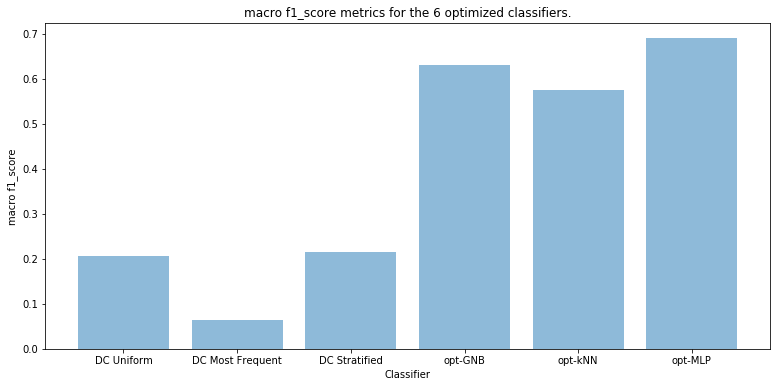

In [122]:
print('----------Macro f1-score analysis----------')
test_labels = [dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test]

for i in range(len(test_labels)):
    res_list = precision_recall_fscore_support(test_labels[i], predictions_macro[i], average='macro')
    f1_score = res_list[2]
    print(i, f1_score)

objects = ['DC Uniform', 'DC Most Frequent', 'DC Stratified', 'opt-GNB', 'opt-kNN', 'opt-MLP']
plot_f1_opt(predictions_macro, test_labels, objects, 'macro')


----------Micro f1-score analysis----------


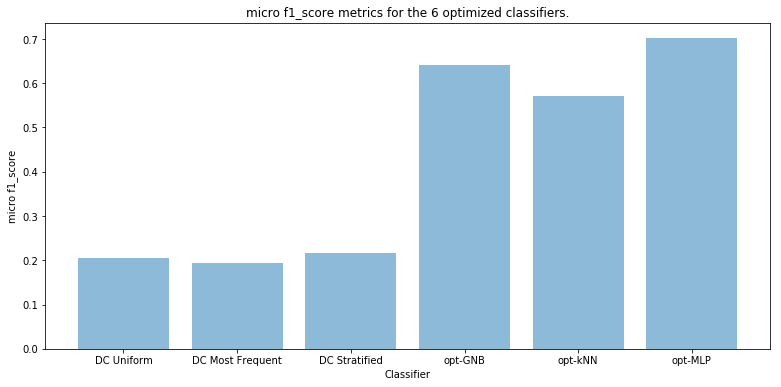

In [228]:
print('----------Micro f1-score analysis----------')
test_labels = [dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test]

objects = ['DC Uniform', 'DC Most Frequent', 'DC Stratified', 'opt-GNB', 'opt-kNN', 'opt-MLP']
plot_f1_opt(predictions_micro, test_labels, objects, 'micro')

<div class="alert alert-block alert-info">
<b>Question Δ4 : </b> Τυπώστε πίνακα με τη μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους. 
</div>

In [391]:
#Old VS New.
from beautifultable import BeautifulTable
from sklearn.metrics import accuracy_score
table = BeautifulTable()
table.column_headers = ["Classifier", "Not opt Score", "f1-macro opt Score", "f1-micro opt Score"]

# Not optimized.
objects = ('DC-Un', 'DC-MF', 'DC-Str', 'GNB', 'kNN', 'MLP')
#preds = Baseline_predictions

test_labels_base = [dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test]
test_labels = [dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test, dum_y_test]



for i,clf in enumerate(objects):
    table.append_row([clf, accuracy_score(test_labels_base[i], Baseline_predictions[i]), accuracy_score(test_labels[i], predictions_macro[i]), accuracy_score(test_labels[i], predictions_micro[i])])

print(table)


+------------+---------------+------------------------+------------------------+
| Classifier | Not opt Score |   f1-macro opt Score   |   f1-micro opt Score   |
+------------+---------------+------------------------+------------------------+
|   DC-Un    |     0.204     |         0.206          |         0.206          |
+------------+---------------+------------------------+------------------------+
|   DC-MF    |     0.193     |         0.193          |         0.193          |
+------------+---------------+------------------------+------------------------+
|   DC-Str   |     0.197     |         0.216          |         0.216          |
+------------+---------------+------------------------+------------------------+
|    GNB     |     0.441     |         0.641          |         0.641          |
+------------+---------------+------------------------+------------------------+
|    kNN     |     0.464     |         0.572          |         0.572          |
+------------+--------------

In [35]:
# Comparing the accuracy with no normalization, with scale and with minmax
objects = ('GNB', 'kNN', 'MLP')

table = BeautifulTable()
table.column_headers = ["Classifier", "No norm Score", "Scaler norm Score", "Minmax norm Score"]

for i,clf in enumerate(objects):
    table.append_row([clf, accuracy_score(test_labels[i+3], predictions_no_norm[i]), accuracy_score(test_labels[i+3], predictions_macro[i+3]), accuracy_score(test_labels[i+3], predictions_minmax[i])])
    
print(table)

+------------+---------------+------------------------+------------------------+
| Classifier | No norm Score |   Scaler norm Score    |   Minmax norm Score    |
+------------+---------------+------------------------+------------------------+
|    GNB     |     0.643     |         0.631          |         0.629          |
+------------+---------------+------------------------+------------------------+
|    kNN     |     0.572     |         0.574          |         0.565          |
+------------+---------------+------------------------+------------------------+
|    MLP     |     0.337     |         0.713          |         0.431          |
+------------+---------------+------------------------+------------------------+


<div class="alert alert-block alert-info">
<b>Question Δ5 : </b>  Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης, τη μεταβολή της απόδοσης και τους χρόνους εκτέλεσης. 
</div>

Παρατηρώντας τις αποδόσεις των ταξινομητών συνολικά, βλέπουμε ότι το μέγιστο f1-score που μπορούμε να πετύχουμε είναι 70% και αυτό με τη χρήση βελτιστοποιημένου MLP. Από μια γενική ματιά, το αποτέλεσμα αυτό δεν είναι ιδιαίτερα καλό αλλά ούτε και κακό, δεδομένου ότι οι κατηγορίες προς ταξινόμηση είναι 5 και ένας Dummy ταξινομητής θα είχε απόδοση 20%.

Με μια πιο λεπτομερή ματιά όμως στο Dataset, βλέπουμε ότι η 1η κλάση αφορά άτομα με επιληψία ενώ οι κλάσεις 2,3,4,5 όχι και ότι στη βιβλιογραφία το συγκεκριμένο Dataset ανδιμετωπίζεται ως Binary με τη μια κλάση να είναι αυτή της επιληψίας και τις 2,3,4,5 να αποτελούν τη δεύτερη ενιαία κατηγορία. Αντιμετωπίζοντας τα παραπάνω αποτελέσματα σαν το Dataset να ήταν Binary, από τα Clasification report και τα confusion matrix, βλέπουμε ότι όλοι οι ταξινομητές έχουν σημαντικά μεγαλύτερη επιτυχία στις στην ταξινόμηση της 1ης κλάσης, με τον MLP να φτάνει σκορ μέχρι και 94% κάνοντας την συγκεκριμένη ταξινόμηση αρκετά επιτυχή στο Binary πρόβλημα, που στη πράξη είναι και το πιο σημαντικό.

Έτσι το 70% σκορ στις 5 κλάσεις μπορεί να θεωρηθεί καλό, μιας και οι λοιπές κατηγορίες 2,3,4,5 είναι δυσδιάκριτες μεταξύ τους και δίνεται περισσότερη έμφαση στη περίπτωση όπου στο Dataset κυριαρχούν οι 2 κλάσεις.

- Για τους χρόνους εκτέλεσης:

Από τον αντίστοιχο πίνακα, βλέπουμε ότι η ταξινόμηση του GNB είναι σχετικά γρήγορη, ότι μετά ακολουθεί ο kNN και με μεγάλη διαφορά τον μεγαλύτερο χρόνο εκτέλεσης τον έχει ο MLP. Ο kNN είναι λογικό να απαιτεί περισσότερο χρόνο από τον GNB μιας και πρέπει να βρεθεί το βέλτιστο k και άλλες παράμετροι, ενώ η μόνη παράμετρος που βελτιστοποιεί ο GNB είναι τα Components του PCA. Από την άλλη, παρατηρούμε ότι η εκπαίδευση του MLP απαιτεί σημαντικά αυξημένο χρόνο σε σχέση με τους υπόλοιπους ταξινομητές. Αυτό οφείλεται από τη μια στον αυξημένο αριθμό υπερπαραμέτρων που θα πρέπει να βελτιστοποιηθούν και από την άλλη από την ίδια τη φύση του MLP που θα πρέπει σε κάθε επανάληψη να ενημερωθούν μεγάλος αριθμός βαρών, πολλαπλάσιο των νευρώνων που υπάρχουν στο hidden layer, διαδικασία η οποία είναι χρονοβόρα.

- Για την μεταβολή της απόδοσης:

Σύμφωνα με τον παραπάνω πίνακα, παρατηρούμε μεταβολή της απόδοσης από 44.1% (χωρίς βελτιστοιποίηση) σε 64.1% (με βελτιστοποίηση υπερπαραμέτρων) για τον GNB, από 46.4% σε 57.2% για τον kNN, ενώ λιγότερο από 3% είναι η βελτίωση για τον MLP. Η βελτίωση είναι αρκετά σημαντική για τους δύο πρώτους ταξινομητές στους οποίους φαίνεται να έπαιξε μεγάλο ρόλο η μείωση της διάταστασης μέσω PCA και η εύρεση του βέλτιστου k για τον kNN. Αντίθετα η βελτίωση του MLP είναι μικρή. Αυτό αφενός οφείλεται στο ότι η μείωση διαστάσεων με PCA δεν αλλάζει ιδιαίτερα την απόδοση του ταξινομητή (σίγουρα μειώνει τον χρόνο εκτέλεσης του) ενώ οι περισσότερες default τιμές του ταξινομητή φαίνεται να είναι και οι βέλτιστες.

- Προεπεξεργασία των δεδομένων και κανονικοποίηση:

Αρχικά να αναφερθεί ότι στο στάδιο της προεπεξεργασίας των δεδομένων, δεν πραγματοποιήθηκε μείωση της διαστατικότητας μέσω Variance Threshold. Το στάδιο αυτό παραλείφθηκε διότι όλα τα χαρακτηριστικά του Dataset είναι τιμές στον χρόνο ενός εγκεφαλογραφήματος, δηλαδή όλα τα χαρακτηριστικά αναπαριστούν το ίδιο μέγεθος σε διαφορετικές χρονικές στιγμές και έτσι δεν περιμένουμε μεγάλες διακυμάνσεις στη διακύμανση μεταξύ των χαρακτηριστικών, έτσι ώστε να αφαιρεθούν.

Τώρα σε ότι αφορά την κανονικοποίηση ή μη των χαρακτηριστικών, βλέπουμε ότι η διαφορά στην απόδοση για το GNB και kNN είναι αμελητέα και για τη κανονικοποίηση minmax αλλά και για τα αρχικά μη κανονικοποιημένα δεδομένα. Αυτό οφείλεται στο ότι στα αρχικά δεδομένα όλα τα features βρίσκονται στο ίδιο εύρος τιμών και έχουν την ίδια συμπεριφορά (διότι όπως αναφέρθηκε αναπαριστούν το ίδιο πράγμα), έτσι η εύρεση πχ του κοντινότερου γείτονα για τον kNN θα δίνει πάντοτε το ίδιο αποτέλεσμα διότι ναι μεν οι αποστάσεις των γειτόνων θα αλλάξουν με τη κανονικοποίηση, αλλά ο κοντινότερος γείτονας θα παραμείνει ο ίδιος.

Από την άλλη, ο MLP στα μη κανονικοποιημένα δεδομένα και στη κανονικοποίηση minmax αποδίδει πολύ χειρότερα σε σχέση με τη κανονικοποίηση του Variance, ρίχνοντας την απόδοση κατά 25% περίπου. Αυτό οφείλεται στο ότι οι τιμές των χαρακτηριστικών πχ στα μη κανονικοποιημένα δεδομένα μπορεί να είναι είτε πολύ μεγάλα είτε πολύ μικρά με αποτέλεσμα να μεταβάλει τις τιμές των βαρών με τρόπο ώστε να επιφέρουν κακή δυνατότητα ταξινόμησης. 

-  Διαδικασία επιλογής υπερπαραμέτρων MLP :

Πέρα από όσα έχουμε περιγράψει στις ενότητες με τον κώδικα του MLP, θα θέλαμε να αναφερθούμε στην επιλογή μας να αποκλείσουμε εξ' αρχής (κυρίως για υπολογιστικούς σκοπούς) κάποιες τιμές παραμέτρων. Έτσι, τρέχοντας δοκιμαστικά μικρότερα MLP παραδείγματα παρατηρήσαμε μία εργοδικότητα στην μη εμφάνιση της τιμής 100 στο max_iter και στο identity του activation function. Επίσης, μικρός αριθμός hidden layers (25, 50) ήταν πολύ σπάνιος και έτσι αποφασίσαμε να αποκλείσουμε τις περιπτώσεις αυτές, μειώνοντας το μέγεθος του search space. Φυσικά, η αναζήτηση μας δεν είναι εξαντλητική και η λύση λογικά δεν έχει βρει το ολικά βέλτιστο. Όμως, έχει βρει το βέλτιστο σε ένα μεγάλο σύνολο τιμών και σε ικανοποιητικό υπολογιστικά χρόνο (tradeoff μεταξύ επίδοσης-χρόνου).


<table width=\"85%\">
   <caption>Πίνακας : Στάδια search space για MLP.</caption>
   <thead>
   <tr>
       <th>Searching hyperparameters for :</th>
       <th>Search Space</th>
       <th>Optimal</th>
   </tr>
   </thead>
   <tbody>
       <tr>
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">Small sampled dataset with Macro</td>
           <td style=\"background-color:#F2F4F7\" rowspan=\"3\">
               hidden_layer_sizes = [(10,), (25,), (100,)], 
               activation = ['identity', 'tanh', 'relu'],   
               solver = ['lbfgs', 'sgd'],   
               max_iter = [300],   
               learning_rate = ['invscaling', 'adaptive'],  
               alpha = [0.00005, 0.0001], n_components = [40, 60, 80]
          </td>
    
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">
           {'MLP__activation': 'relu', 'MLP__alpha': 5e-05, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'adaptive', 'MLP__max_iter': 300, 'MLP__solver': 'sgd', 'pca__n_components': 40}</td>  
       </tr>      
       
       <tr>
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">Small sampled dataset with Micro</td>
           <td style=\"background-color:#F2F4F7\" rowspan=\"3\">
               hidden_layer_sizes = [(10,), (25,), (100,)],
    activation = ['identity', 'tanh', 'relu'],
    solver = ['lbfgs', 'sgd'] ,
    max_iter = [300],
    learning_rate = ['invscaling', 'adaptive'],
    alpha = [0.00005, 0.0001],
    n_components = [40, 60, 80]
          </td>
    
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">
           {'MLP__activation': 'relu', 'MLP__alpha': 5e-05, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'adaptive', 'MLP__max_iter': 300, 'MLP__solver': 'sgd', 'pca__n_components': 40}</td>  
       </tr>
   
   
   <tr>
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">Big dataset with Macro</td>
           <td style=\"background-color:#F2F4F7\" rowspan=\"3\">
               n_components = [40],
    hidden_layer_sizes = [(50,), (100,)],
    activation = ['logistic', 'tanh', 'relu'],
    solver = ['lbfgs', 'sgd', 'adam'] ,
    max_iter = [200, 300],
    learning_rate = ['constant', 'invscaling', 'adaptive'],
    alpha = [0.00005, 0.0001, 0.0002]
          </td>
    
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">
           {'MLP_activation': 'logistic', 'MLP__alpha': 0.0002, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 300, 'MLP__solver': 'adam', 'pca__n_components': 40}</td>  
       </tr>
   
      <tr>
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\"> Big dataset with Micro</td>
           <td style=\"background-color:#F2F4F7\" rowspan=\"3\">
               hidden_layer_sizes = [(100,)],
    activation = ['logistic', 'tanh', 'relu'],
    solver = ['lbfgs', 'sgd', 'adam'] ,
    max_iter = [300],
    learning_rate = ['constant', 'invscaling', 'adaptive'],
    alpha = [0.0001, 0.0002]
          </td>
    
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">
           {'MLP__activation': 'logistic', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'invscaling', 'MLP__max_iter': 300, 'MLP__solver': 'adam', 'pca__n_components': 40}</td>  
       </tr>
   
   
         <tr>
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">Big dataset with Macro on PCA</td>
           <td style=\"background-color:#F2F4F7\" rowspan=\"3\">
              hidden_layer_sizes = [(100,)],
    activation = ['logistic'],
    solver = ['adam'],
    max_iter = [300],
    learning_rate = ['constant'],
    alpha = [ 0.0002],
    n_components=[20, 40, 60, 80, 100]
          </td>
    
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">
           {'MLP__activation': 'logistic', 'MLP__alpha': 0.0002, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 300, 'MLP__solver': 'adam', 'pca__n_components': 60}</td>  
       </tr>
   
           <tr>
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">Big dataset with Micro on PCA</td>
           <td style=\"background-color:#F2F4F7\" rowspan=\"3\">
                        hidden_layer_sizes = [(100,)],
    activation = ['logistic'],
    solver = ['adam'],
    max_iter = [300],
    learning_rate = ['constant'],
    alpha = [ 0.0002],
    n_components=[20, 40, 60, 80, 100]
          </td>
    
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">
            {'MLP__activation': 'logistic', 'MLP__alpha': 0.0002, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 300, 'MLP__solver': 'adam', 'pca__n_components': 60}</td>  
       </tr>
   
   
          </tr>
   
           <tr>
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">Big dataset no norm</td>
           <td style=\"background-color:#F2F4F7\" rowspan=\"3\">
             Same as above
          </td>
    
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">
            {'MLP__activation': 'logistic', 'MLP__alpha': 0.0002, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 300, 'MLP__solver': 'adam', 'pca__n_components': 40}</td>  
       </tr>
       
           
                      <tr>
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">Big dataset minmax</td>
           <td style=\"background-color:#F2F4F7\" rowspan=\"3\">
             Same as above
          </td>
    
           <td style=\"background-color:#F2F4F7\" rowspan=\"2\">
            {'MLP__activation': 'logistic', 'MLP__alpha': 0.0002, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 300, 'MLP__solver': 'adam', 'pca__n_components': 40}</td>  
       </tr>
   </tbody>
</table>

In [ ]:
#----------- EOF -----------#